In [12]:
import pandas as pd
import argparse
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
import random 

In [13]:
# read input file
filepath = "space_mountain.csv"
df = pd.read_csv(filepath)

In [14]:
# one hot encode the Day of Week column
# drop_first=True is used to avoid multicollinearity (dummy variable trap)
df = pd.get_dummies(df, columns=['Day of Week']) 

In [15]:
# ------ SPLITTING DATASET ------
train_years = ['14', '15', '16', '17', '18', '19', '22']
dev_years = ['23']
test_years = ['24', '25']

df['Year'] = df['Date'].apply(lambda x: x.split('/')[-1])  # Extract year as a string
df = df[df['Time of Day'] >= 450]
df['Time_sq'] = df['Time of Day'] ** 2
df['Time_sin'] = np.sin(2 * np.pi * df['Time of Day'] / 1440)
df['Time_cos'] = np.cos(2 * np.pi * df['Time of Day'] / 1440)

train_df = df[df['Year'].isin(train_years)]
dev_df = df[df['Year'].isin(dev_years)]
test_df = df[df['Year'].isin(test_years)]

print("Train size:", train_df.shape)
print("Dev size:", dev_df.shape)
print("Test size:", test_df.shape)

Train size: (50962, 16)
Dev size: (8215, 16)
Test size: (11288, 16)


In [16]:
# getting datasets
def get_X_y(dataframe):
    y = dataframe['Wait Time'].values
    X = dataframe.drop(columns=['Wait Time', 'Date', 'Time', 'Year'])
    return X, y

X_train, y_train = get_X_y(train_df)
X_dev, y_dev = get_X_y(dev_df)
X_test, y_test = get_X_y(test_df)

In [17]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Dev predictions
y_dev_pred = model.predict(X_dev)
rmse_dev = np.sqrt(mean_squared_error(y_dev, y_dev_pred))
print("Dev RMSE: {:.4f}".format(rmse_dev))

Dev RMSE: 17.5767


In [19]:
# Test predictions
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE: {:.4f}".format(rmse_test))

Test RMSE: 17.2529


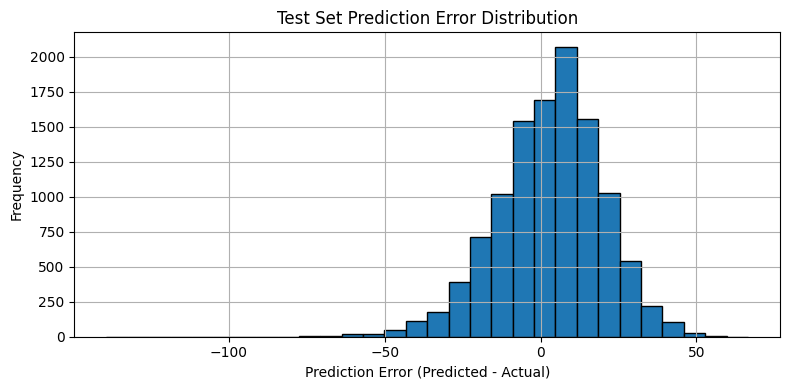

In [20]:
# Error histogram for test set
errors = y_test_pred - y_test
plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Test Set Prediction Error Distribution")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print(type(errors))

# save errors to CSV file
errors_df = pd.DataFrame(errors, columns=['Prediction Error'])
errors_df.to_csv('lin_reg.csv', index=False)

<class 'numpy.ndarray'>
